In [5]:
cd ..

/home/heather/galvanize/Capstone2/Capstone2_git_fix/Capstone2_temp_name


In [6]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from src.clean_data_class import Clean_data
from src.helper_functions import orig_vect, plot_word_cloud

## Save and Concate all files into csv

In [7]:

# df1 = pd.read_json('bucket1.json', lines = True)
# df2 = pd.read_json('bucket2.json', lines = True)
# df3 = pd.read_json('bucket3.json', lines = True)
# df4 = pd.read_json('bucket4.json', lines = True)
# df5 = pd.read_json('bucket5.json', lines = True)
# frames = [df1a, df2a, df3a]
# result = pd.concat(frames)
# f = df1.copy()
# s = df2.copy()
# t = df3.copy()
# fo = df4.copy()
# fi = df5.copy()
# cols = [f,s,t,fo,fi]
# comments_df = pd.concat(cols)

# comments_df.to_csv('../fulldata.csv')

data = pd.read_csv('/home/heather/galvanize/Capstone2/fulldata.csv')


In [8]:
df = Clean_data(data)

## Clean Data

In [9]:
df.drop_null()

In [10]:
df.to_date_time()

KeyboardInterrupt: 

In [ ]:
df.add_date()

In [30]:
df.add_hour()

In [51]:
df = df.set_values()

In [12]:
df = data

In [13]:
len(df.text)

1806316

In [9]:
# Save progress

# df.to_csv('../cleaned_comments.csv', index = False)

#Utilize sample for quicker testing
sample_df= df.sample(frac=1/15, random_state=1)
# sample_df.to_csv('../sample_df.csv', index = False)

# EDA

In [17]:
ordered = df.sort_values(by='created_at')

tot = ordered.groupby('created').sum()

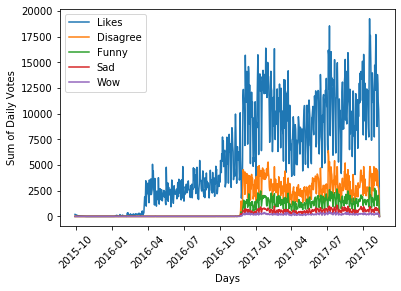

In [37]:
plt.plot(tot.likes, label = 'Likes')
plt.plot(tot.disagree, label = 'Disagree')
plt.plot(tot.funny, label = 'Funny')
plt.plot(tot.sad, label = 'Sad')
plt.plot(tot.wow, label = 'Wow')
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Sum of Daily Votes')
plt.legend();

# plt.savefig('ratings_per_day')
# around February of 2016 we have our first instances of ratings other than likes

In [21]:
# tot2 = ordered.groupby('created').count()
#for each day...comments got lots of the likes that were available...daily popularity...ratio of likes available
np.median(df.likes)

1.0

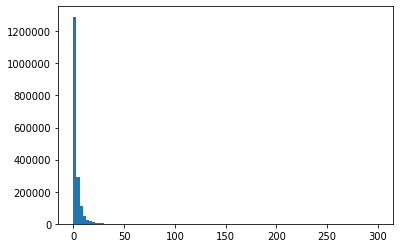

In [23]:
plt.hist(df.likes, bins = 100);

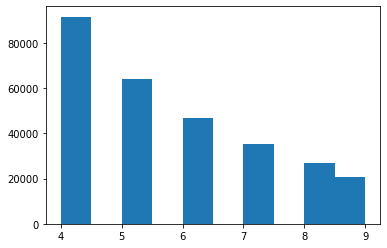

In [40]:
df[df.likes>= 4].likes.describe()
plt.hist(df[(df.likes>= 4) & (df.likes<10)].likes);

In [41]:
text_length = []
for i in df.text.values:
    text_length.append(len(i))

In [ ]:
#weighting: to fix imbalance (SMOTE)
#add back all zero ratings (DONE)
#try predicting disagreement 
#reevaluate "liked" cutoff 
#explore ratios of likes 

In [45]:
df['text_length'] = text_length

In [46]:
df.rating.replace({0: 'Rejected', 1:'Approved'}, inplace = True)

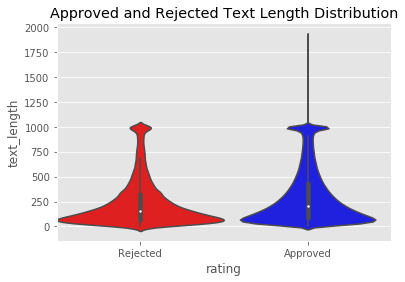

In [48]:
my_pal = {rating: "b" if rating == "Approved" else "r" for rating in df.rating.unique()}
plt.style.use('ggplot')
sns.violinplot(df.rating ,y = df.text_length, palette=my_pal, width=1)
plt.title('Approved and Rejected Text Length Distribution')
# plt.savefig('../images/violin_rating_txt.png')
plt.show()

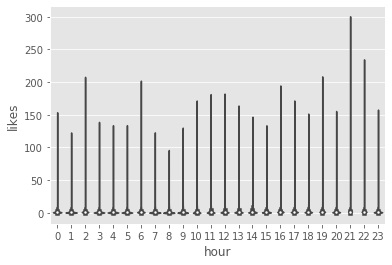

In [49]:
sns.violinplot(df.hour ,y = df.likes)


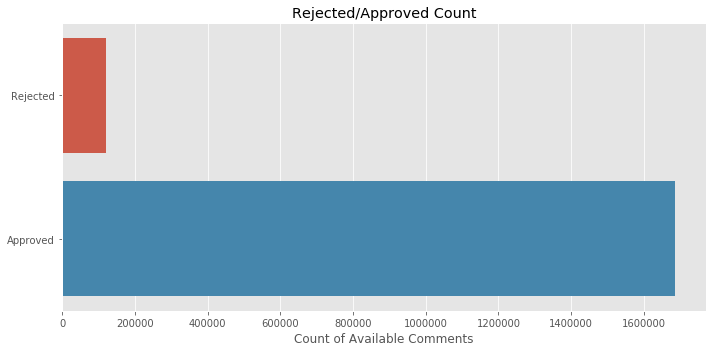

In [50]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize = (10,5))
sns.barplot([120670,1685646],['Rejected','Approved'], ax=ax)
ax.set_xlabel('Count of Available Comments')
plt.title('Rejected/Approved Count')
plt.tight_layout()
plt.savefig('../images/orig_bar.png')
plt.show()

## Vectorize and Visualize text

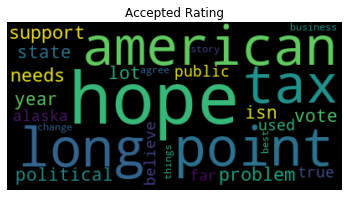

In [68]:
# get indices of words with highest tfidf values
samp = df.sample(frac=1/15, random_state=1)
samp.text

vectorizer, x_train_vect = orig_vect(samp.text)



features = vectorizer.get_feature_names()

approved_features = txt_vect.toarray()[samp['rating']==1].mean(axis=0)
rejected_features = txt_vect.toarray()[samp['rating']==0].mean(axis=0)

approved_set = set(np.array(features)[approved_features.argsort()[::-1][:100]])
rejected_set = set(np.array(features)[rejected_features.argsort()[::-1][:100]])
approved_unique = approved_set.difference(rejected_set)
rejected_unique = rejected_set.difference(approved_set)

plot_word_cloud(' '.join(approved_unique), title = 'Accepted Rating') 
#                 save_fig=True, f_name = 'images/Accepted_wp.png')

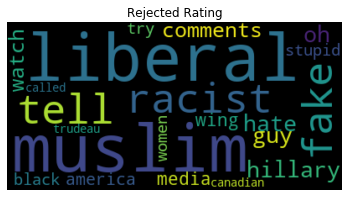

In [70]:
plot_word_cloud(' '.join(rejected_unique), title = 'Rejected Rating') 
#                 save_fig=True, f_name = 'images/Rejected_wp.png')